# Inferential Statistics 

The goal of this notebook is to apply some inferential statistics to the endangered langauges dataset to find the variables that can help me answer the questions I'm posing. Along with finding out if there is any strong correlation between the data. And with finding the best tests to analyze the data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
sns.set(font_scale=1.6)

endangered_languages = pd.read_csv('../data_sets/endangered_languages_ML.csv', index_col=0)

In [36]:
endangered_languages.head()

,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $),The former Yugoslav Republic of Macedonia,Ethiopia,Costa Rica,Sudan,...,Venezuela (Bolivarian Republic of),Sri Lanka,Argentina,Uzbekistan,Senegal,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable
Language,,,,,,,,,,,,,,,,,,,,,
South Italian,7500000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Sicilian,5000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Lombard,3500000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Emilian-Romagnol,2000000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Piedmontese,2000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
columns_to_keep = ['Speakers', 'Fertility Rate Avg', '2018 Rank', '2018 Score', 'Number of Countries Spoken',
                  'GDP Average (Current US $)', 'Critically endangered', 'Definitely endangered', 'Extinct',
                   'Severely endangered', 'Vulnerable']
endangered_languages_scaled_down = endangered_languages[columns_to_keep]

endangered_languages_to_matrix = endangered_languages_scaled_down.corr()
endangered_languages_to_matrix.head()

,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $),Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable
Speakers,1.000000,-0.068409,-0.009407,-0.057125,0.358657,-0.049950,-0.096497,0.007285,-0.061582,-0.070529,0.188177
Fertility Rate Avg,-0.068409,1.000000,0.621772,-0.599657,-0.029270,-0.466073,-0.034119,0.020649,-0.104724,-0.036049,0.115416
2018 Rank,-0.009407,0.621772,1.000000,-0.905096,0.031570,-0.567789,-0.119208,0.091356,-0.096933,-0.020856,0.108030
2018 Score,-0.057125,-0.599657,-0.905096,1.000000,-0.051781,0.658498,0.143767,-0.120718,0.102272,0.048027,-0.130057
Number of Countries Spoken,0.358657,-0.029270,0.031570,-0.051781,1.000000,-0.049782,-0.060362,0.088609,-0.040218,-0.025158,0.020058


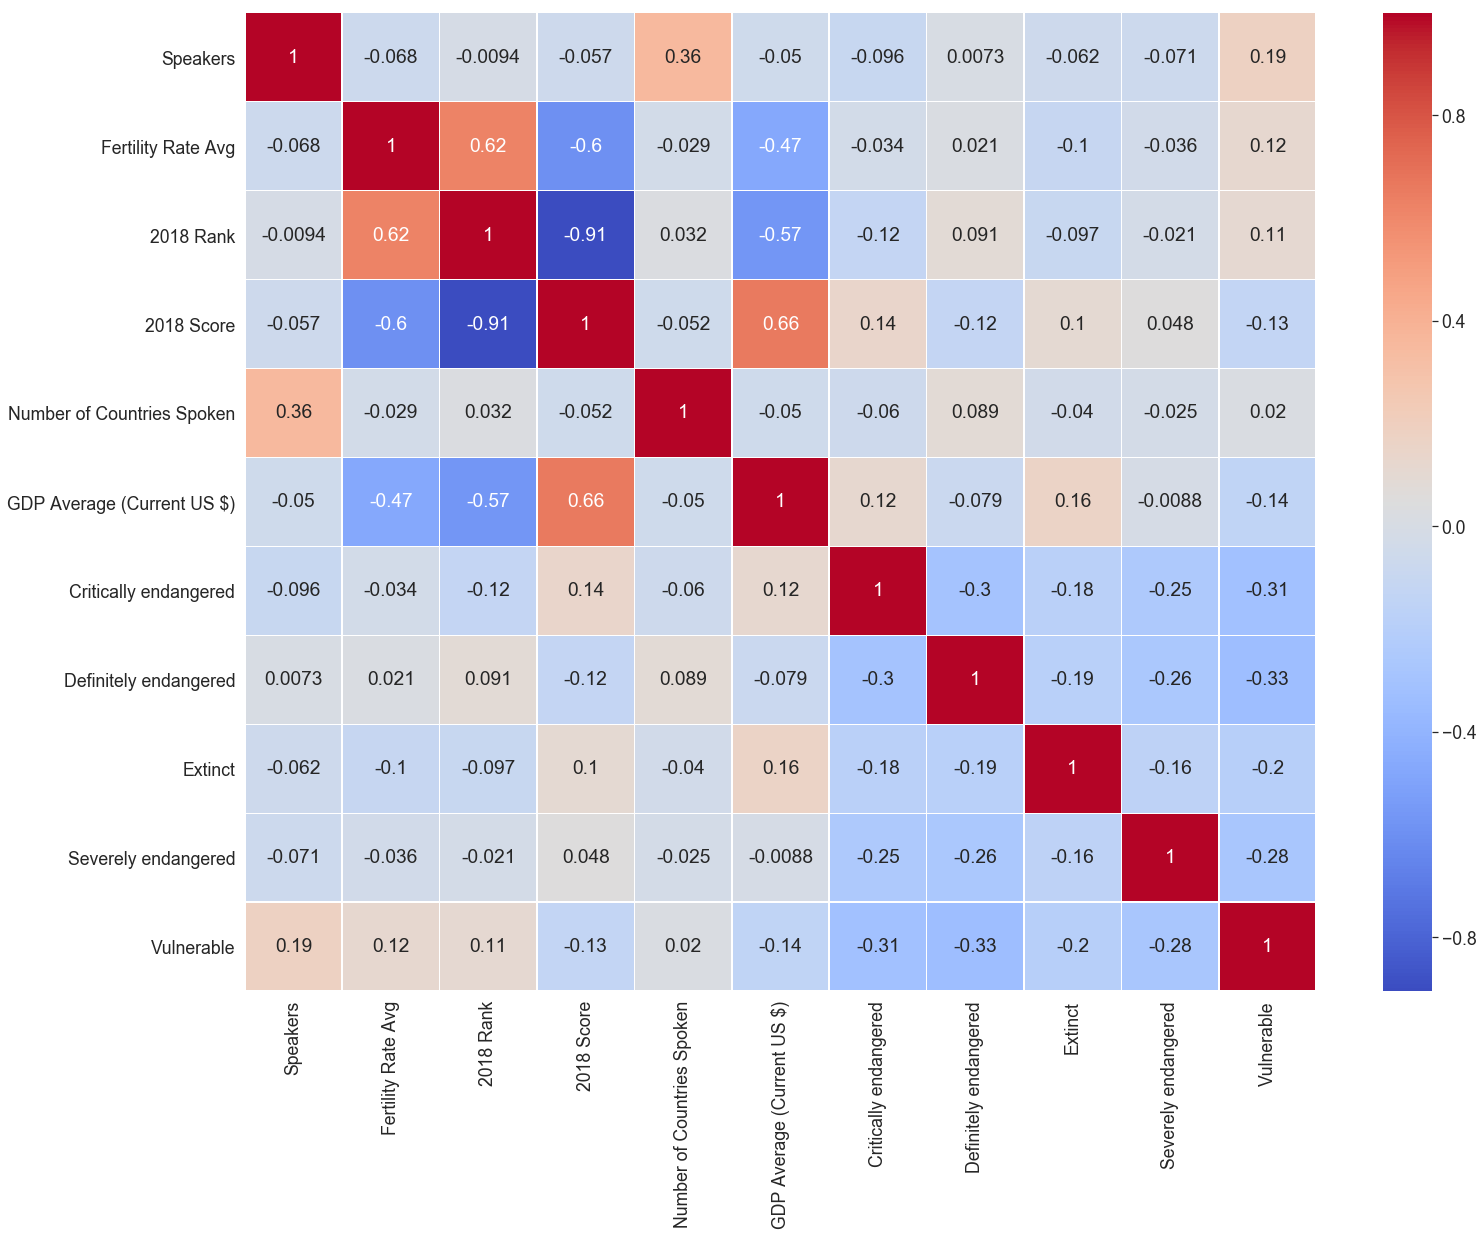

In [39]:
# This will find the pearson correlation coeficient
_ = plt.subplots(figsize=(24, 18))
_ = sns.heatmap(endangered_languages_to_matrix, linewidths=0.5, annot=True, cmap='coolwarm')
plt.show()

In [40]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [41]:
x_speakers, y_speakers = ecdf(endangered_languages['Speakers'])

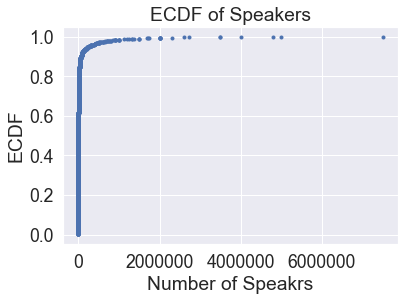

In [45]:
_ = plt.plot(x_speakers, y_speakers, marker='.', linestyle='none')
_ = plt.xlabel('Number of Speakrs')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Speakers')
plt.show()

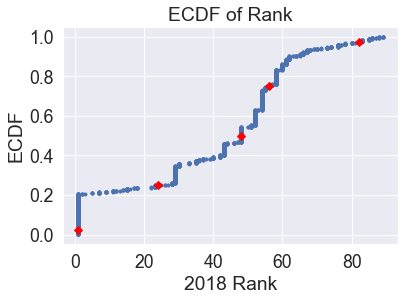

In [47]:
x_rank, y_rank = ecdf(endangered_languages['2018 Rank'])
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_rank = np.percentile(endangered_languages['2018 Rank'], percentiles)
_ = plt.plot(x_rank, y_rank, marker='.', linestyle='none')
_ = plt.xlabel('2018 Rank')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Rank')
_ = plt.plot(ptiles_rank, percentiles/100, marker='D', color='red', linestyle='none')
plt.show()

In [48]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

In [49]:
r = pearson_r(endangered_languages['Speakers'], endangered_languages['2018 Rank'])

In [50]:
r

-0.00940721126007604

In [51]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [52]:
speakers_no_outliers = reject_outliers(endangered_languages['Speakers'])

AttributeError: 'Series' object has no attribute 'info'

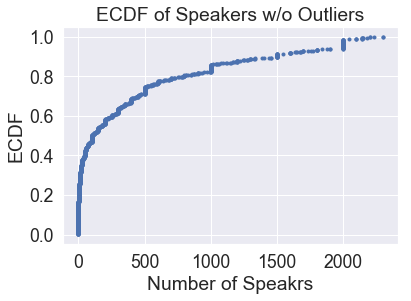

In [54]:
# x_speakers_no_outliers, y_speakers_no_outliers = ecdf(speakers_no_outliers)
# _ = plt.plot(x_speakers_no_outliers, y_speakers_no_outliers, marker='.', linestyle='none')
# _ = plt.xlabel('Number of Speakrs')
# _ = plt.ylabel('ECDF')
# _ = plt.title('ECDF of Speakers w/o Outliers')
# plt.show()

In [56]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(speakers_no_outliers)
sigma = np.std(speakers_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(speakers_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of Speakrs')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Speakers w/o Outliers')
plt.show()

TypeError: exponential() got multiple values for keyword argument 'size'